[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


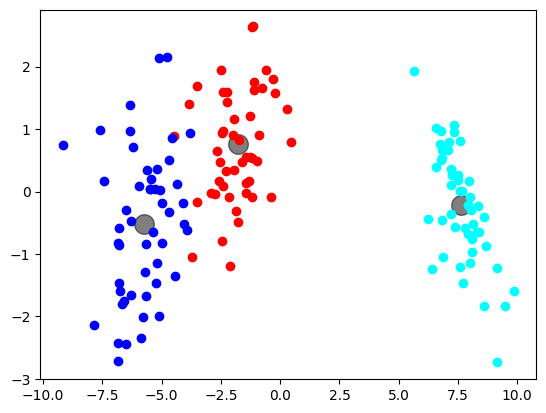

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans


iris = load_iris()
data = iris.data
target = iris.target

print(target)

lda = LDA(n_components=2)
x_train = lda.fit_transform(data,target)


kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_train)


plt.plot(x_train[0:49,0],x_train[0:49,1],'o',color='cyan')
plt.plot(x_train[50:99,0],x_train[50:99,1],'o',color='red')
plt.plot(x_train[100:150,0],x_train[100:150,1],'o',color='blue')
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


#predicted = kmeans.predict(x_train)
#plt.scatter(x_train[:, 0], x_train[:, 1], c=predicted,
#           s=50, cmap='viridis');

plt.show()

In [26]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
import pandas as pd


PATH = 'admissions_releases_states.csv'
dataset = pd.read_csv(PATH)


if True:
    data = dataset \
        .drop("state", axis=1) \
        .drop("date", axis=1)
    target = dataset["state"]

    lda = LDA(n_components=2)
    x_train = lda.fit_transform(data, target)

    kmeans = KMeans(n_clusters=3, random_state=0)
    clusters = kmeans.fit_predict(x_train)

    plt.plot(x_train[0:49,0], x_train[0:49,1], 'o', color='cyan')
    plt.plot(x_train[50:99,0], x_train[50:99,1], 'o', color='red')
    plt.plot(x_train[100:150,0], x_train[100:150,1], 'o', color='blue')

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(x_train)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


    #predicted = kmeans.predict(x_train)
    #plt.scatter(x_train[:, 0], x_train[:, 1], c=predicted,
    #           s=50, cmap='viridis');

    plt.show()

ValueError: could not convert string to float: '2015-02-01'